In [0]:
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import librosa.display

In [0]:
y,sr=librosa.load("/content/drive/My Drive/ML_works/Recommendation_system/Audio_recommendation/Jaane-Nahin-Denge.mp3", duration=120)


# And compute the spectrogram magnitude and phase
S_full, phase = librosa.magphase(librosa.stft(y))

In [0]:
n_fft = 1024
hop_length = int(librosa.time_to_samples(1./200, sr=sr))
lag = 2
n_mels = 138
fmin = 27.5
fmax = 16000.
max_size = 3

In [0]:
y

array([0.        , 0.        , 0.        , ..., 0.17839286, 0.16320673,
       0.16764091], dtype=float32)

In [0]:
sr

22050

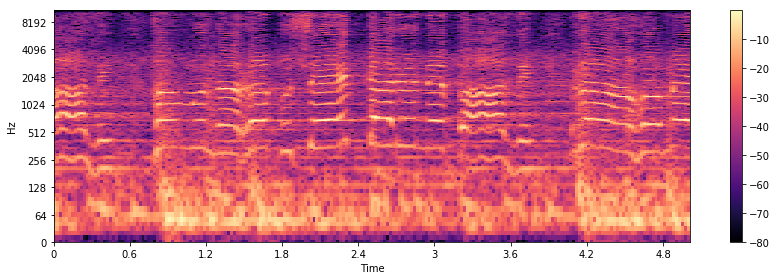

In [0]:
idx = slice(*librosa.time_to_frames([30, 35], sr=sr))
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()

In [0]:
S_filter = librosa.decompose.nn_filter(S_full,
                                       aggregate=np.median,
                                       metric='cosine',
                                       width=int(librosa.time_to_frames(2, sr=sr)))

In [0]:
S_filter = np.minimum(S_full, S_filter)

In [0]:
margin_i, margin_v = 2, 10
power = 2

mask_i = librosa.util.softmask(S_filter,
                               margin_i * (S_full - S_filter),
                               power=power)

mask_v = librosa.util.softmask(S_full - S_filter,
                               margin_v * S_filter,
                               power=power)

# Once we have the masks, simply multiply them with the input spectrum
# to separate the components

S_foreground = mask_v * S_full
S_background = mask_i * S_full

In [0]:
S_foreground

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 5.1219400e-02,
        3.2937931e-04, 4.0492687e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.5929853e-02,
        1.9756335e-07, 2.9510090e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        9.7000558e-04, 4.0013142e-02],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3533157e-04,
        1.0419636e-06, 1.2831814e-02],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 9.2755981e-06,
        2.6928182e-09, 1.4073274e-02],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.5530110e-02]], dtype=float32)

In [0]:
S_background

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.7294155e-02,
        3.4049174e-01, 7.3405267e-03],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.7019196e-01,
        6.3879257e-01, 2.1187069e-02],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0676419e+00,
        3.1562345e+00, 1.1636609e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.9609573e-04,
        9.3905110e-04, 8.9144132e-06],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 4.9161993e-04,
        8.4580661e-04, 5.2694759e-06],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 2.0154355e-05,
        1.8328615e-04, 2.2628076e-06]], dtype=float32)

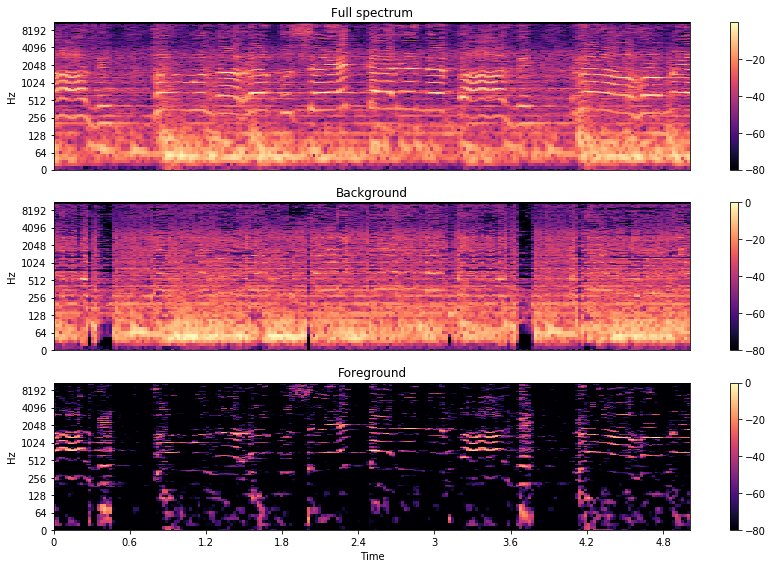

In [0]:
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Full spectrum')
plt.colorbar()

plt.subplot(3, 1, 2)
librosa.display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref=np.max),
                         y_axis='log', sr=sr)
plt.title('Background')
plt.colorbar()
plt.subplot(3, 1, 3)
librosa.display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max),
                         y_axis='log', x_axis='time', sr=sr)
plt.title('Foreground')
plt.colorbar()
plt.tight_layout()
plt.show()

**o